In [1]:
import IPython.display as ipd
test_audio = 'data/kenzo/kenzo_1.wav'
ipd.Audio(test_audio)

In [2]:
import librosa
data, sampling_rate = librosa.load(test_audio)
# data - array de audios
# sampling_rate - taxa de amostragem do arquivo extraído, 
#                 número de amostras de áudio transmitidas por segundo, medido em Hz ou kHz.

In [3]:
import os
import pandas as pd
import librosa
import glob 
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(5, 2))
plt.title('Kenzo')
librosa.display.waveplot(data, sr=sampling_rate)
# gera a vizualização da amplitude de onda

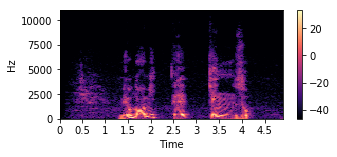

In [4]:
# Short-time Fourier transform
X = librosa.stft(data)
# converte um espectrograma de amplitude em espectrograma em escala de dB
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(5, 2))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()
# representação visual do espectro de freqüências de som ou outros sinais

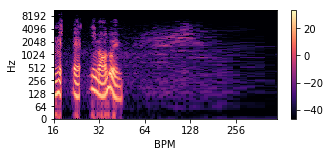

In [5]:
# converte o eixo de freqüência em um logarítmico.

plt.figure(figsize=(5, 2))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis = 'tempo', y_axis = 'log') 
plt.colorbar ()

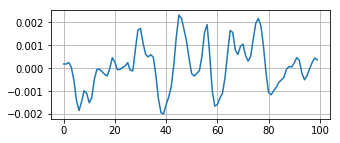

In [6]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(5, 2))
plt.plot(data[n0:n1])
plt.grid()

In [7]:
zero_crossings = librosa.zero_crossings(data[n0:n1], pad=False)
print(sum(zero_crossings))

16


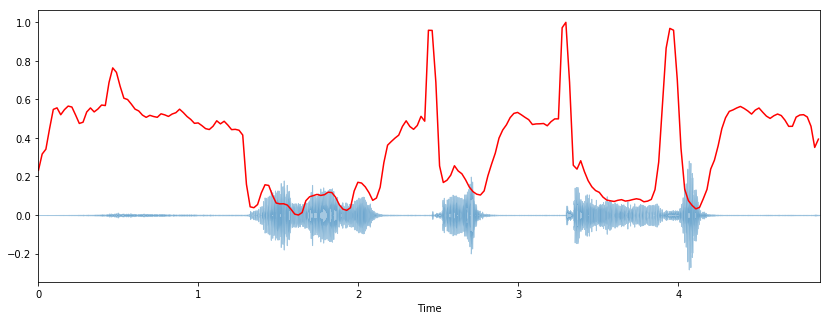

In [8]:
import sklearn

# Spectral Centroid
#
# Indica onde o “centro de massa” de um som está localizado e é 
# calculado como a média ponderada das freqüências presentes no som. 
# Considere duas músicas, uma de um gênero de blues e outra de metal. 
# Agora, em comparação com a música do gênero blues, que é a mesma 
# em toda a sua extensão, a música de metal tem mais freqüências no final. 
# Então, o centróide espectral para a música blues estará em algum lugar 
# perto do meio do seu espectro, enquanto que para uma música de metal estaria no fim.

spectral_centroids = librosa.feature.spectral_centroid(data, sr=sampling_rate)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

#
# não rola
#

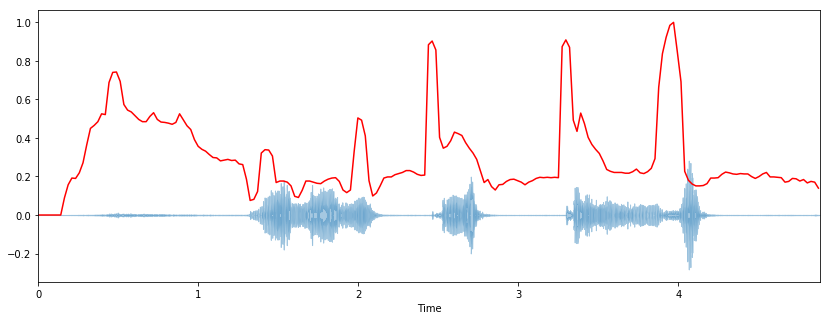

In [9]:
# Rolloff espectral
#
# É uma medida da forma do sinal. Representa a frequência abaixo 
# da qual está uma porcentagem especificada da energia espectral total
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sampling_rate)[0]
plt.figure(figsize=(14, 5))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

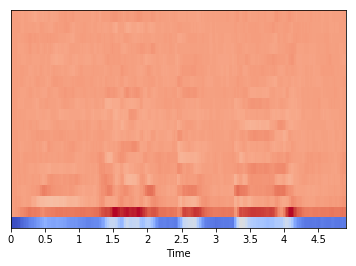

In [10]:
# Mel-Frequency Cepstral Coefficients
#
# Os coeficientes cepstrais da frequência Mel (MFCCs) de um sinal 
# são um pequeno conjunto de características (geralmente cerca de 10–20) 
# que descrevem de forma concisa a forma geral de um envelope espectral. 
# Modela as características da voz humana.

mfccs = librosa.feature.mfcc(data, sr=sampling_rate)

#MFCCs:
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

[ 8.05043236e-16 -1.76530723e-16 -5.49323620e-16 -9.78680012e-17
  1.19177969e-16  1.57851615e-17 -6.10359578e-17  1.31543012e-16
  6.02466997e-17 -3.28331359e-16 -1.28806918e-15  2.21781519e-16
 -1.14442421e-17  9.73418292e-17  4.52507963e-17 -2.70452433e-16
  1.49432862e-16  1.26412835e-16 -5.09334544e-16  2.78871186e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


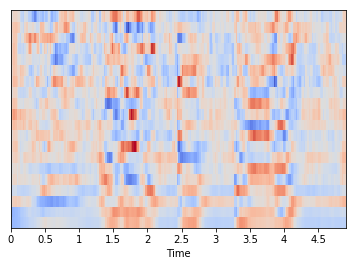

In [11]:
# ?????????

mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

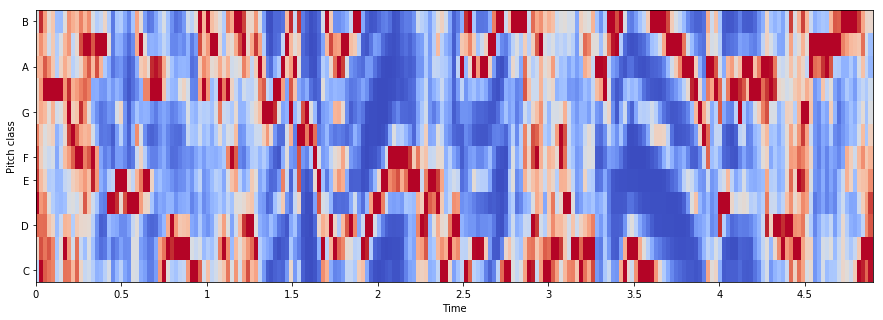

In [12]:
# 

hop_length = 512
chromagram = librosa.feature.chroma_stft(data, sr=sampling_rate, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [13]:
import os

classes = []

# buscando os nomes de todas as classes
for name in os.listdir("data"):
    classes.append(name)
    os.remove(f'csv/data_{name}.csv')

# definindo os dados que serão analisados
header = 'filename chroma_stft spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [14]:
import numpy as np
import csv

print(classes)
for person in classes:
    data_file = f'csv/data_{person}.csv'
    file = open(data_file, 'a', newline='')

    # criando csv para inserção de dados
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
        
    for filename in os.listdir(f'data/{person}'):
        songname = f'data/{person}/{filename}'
        print(songname)
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        # {np.mean(rmse)}
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {person}'
        file = open(data_file, 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

['iso', 'kenzo', 'lucas', 'mari', 'random']
data/iso/iso_1.wav
data/iso/iso_2.wav
data/iso/iso_3.wav
data/iso/iso_4.wav
data/kenzo/kenzo_1.wav
data/kenzo/kenzo_2.wav
data/kenzo/kenzo_3.wav
data/kenzo/kenzo_4.wav
data/lucas/lucas_1.wav
data/mari/mari_1.wav
data/mari/mari_2.wav
data/mari/mari_3.wav
data/mari/mari_4.wav
data/mari/mari_5.wav
data/random/random_1.wav
data/random/random_2.wav


In [15]:
datas = []

for person in classes:
    data_file=f'csv/data_{person}.csv'
    data=pd.read_csv(data_file)
    data=data.reindex(np.random.permutation(data.index))
    datas.append(data)
    
datas[1].head()

filename  chroma_stft  spectral_centroid  spectral_bandwidth  \
3  kenzo_4.wav     0.419654        1572.511734         1581.591028   
0  kenzo_1.wav     0.414287        1684.533436         1651.346053   
1  kenzo_2.wav     0.432552        1548.390249         1587.464164   
2  kenzo_3.wav     0.460332        1777.954926         1760.735186   

       rolloff  zero_crossing_rate       mfcc1       mfcc2      mfcc3  \
3  3048.328576            0.088765 -446.891782  130.911874 -19.405535   
0  3157.522771            0.100331 -465.704100  114.932718 -12.369236   
1  3055.210983            0.087068 -446.147582  129.624667 -23.964157   
2  3445.887416            0.103414 -469.626657  115.015319  -8.021031   

       mfcc4  ...    mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17  \
3  13.926291  ... -7.350302  2.134655 -2.546449 -0.907345 -2.800424 -0.328603   
0  17.533184  ... -6.333129 -0.667344 -3.181014 -2.832403 -4.545513 -3.323363   
1  20.083148  ... -2.213462  2.446100 -3.487390  1.199024 -4.004175 -6.613223   
2  19.763533  ... -3.667183 -0.234735 -2.926210 -1.705883 -1.012226 -2.506706   

     mfcc18    mfcc19    mfcc20  label  
3 -1.538962 -8.490110 -5.295434  kenzo  
0 -1.801362 -3.953033 -0.653561  kenzo  
1 -3.613651 -6.336938 -1.944789  kenzo  
2 -2.150383 -4.127589 -0.658571  kenzo  

[4 rows x 27 columns]

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

model_train = {}

class ModelTrain(object):
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

for person in classes:
    genre_list = data.iloc[:, -1]
    encoder = LabelEncoder()
    y = encoder.fit_transform(genre_list)
    
    scaler = StandardScaler()
    X = scaler.fit_transform(np.array(data.iloc[:, 1:-1], dtype = float))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    model = ModelTrain(X_train, X_test, y_train, y_test)
    model_train[person] = model

In [17]:
for person in classes:
    print(model_train[person].__dict__)

{'X_train': array([[-1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,
        -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.]]), 'X_test': array([[ 1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,
         1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1.]]), 'y_train': array([0]), 'y_test': array([0])}
{'X_train': array([[ 1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,
         1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1.]]), 'X_test': array([[-1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,
        -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.]]), 'y_train': array([0]), 'y_test': array([0])}
{'X_train': array([[-1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,
        -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.]]), 'X_test': array([[ 1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,
         1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.

In [18]:
# treinando apenas 1 modelo
person = 'kenzo'

from keras import models, layers

model = models.Sequential()

model.add(layers.Dense(128, activation='relu', input_shape=(model_train[person].X_train.shape[1],)))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               3328      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 13,730
Trainable params: 13,730
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(model_train[person].X_train,
                    model_train[person].y_train,
                    validation_data=[model_train[person].X_test, model_train[person].y_test],
                    batch_size=128,
                    epochs=15,
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 1 samples, validate on 1 samples
Epoch 1/15
1/1 [==============================] - 0s 376ms/step - loss: 0.6932 - acc: 0.0000e+00 - val_loss: 0.5186 - val_acc: 1.0000
Epoch 2/15
1/1 [==============================] - 0s 3ms/step - loss: 0.5637 - acc: 1.0000 - val_loss: 0.5028 - val_acc: 1.0000
Epoch 3/15
1/1 [==============================] - 0s 3ms/step - loss: 0.4734 - acc: 1.0000 - val_loss: 0.4872 - val_acc: 1.0000
Epoch 4/15
1/1 [==============================] - 0s 2ms/step - loss: 0.4048 - acc: 1.0000 - val_loss: 0.4737 - val_acc: 1.0000
Epoch 5/15
1/1 [==============================] - 0s 4ms/step - loss: 0.3565 - acc: 1.0000 - val_loss: 0.4596 - val_acc: 1.0000
Epoch 6/15
1/1 [==============================] - 0s 2ms/step - loss: 0.3141 - acc: 1.0000 - val_loss: 0.4454 - val_acc: 1.0000
Epoch 7/15
1/1 [==============================] - 0s 996us/step - loss: 0.2764 - acc: 1.0000 - val_loss: 0.4329 - val_acc: 1.0000
Epoch 

In [22]:
print(history.history)

{'val_loss': [0.5185928344726562, 0.5028089284896851, 0.4872094690799713, 0.4737265408039093, 0.45964279770851135, 0.44541943073272705, 0.43289268016815186, 0.4212328791618347, 0.41038861870765686, 0.40010589361190796, 0.3901927173137665, 0.3806670308113098, 0.3712203800678253, 0.3611876666545868, 0.35124120116233826], 'val_acc': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [0.6932024359703064, 0.5637285709381104, 0.4734141230583191, 0.4047694802284241, 0.3565210700035095, 0.3140557110309601, 0.2763851583003998, 0.24025318026542664, 0.20598700642585754, 0.17538364231586456, 0.1488039344549179, 0.12542827427387238, 0.10544241964817047, 0.08749516308307648, 0.07195458561182022], 'acc': [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}


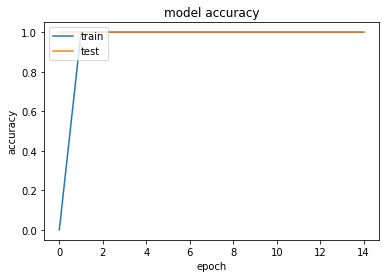

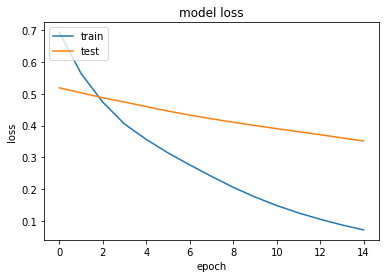

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()